In [1]:
"""
import necessary libraries
"""
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from yellowbrick.regressor import PredictionError, CooksDistance, ManualAlphaSelection, ResidualsPlot
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

# *__California Housing Data Regression Analysis__*

Attribute Information:
- MedInc        median income in block group (Tens of Thousands of Dollars)
- HouseAge      median house age in block group
- AveRooms      average number of rooms per household
- AveBedrms     average number of bedrooms per household
- Population    block group population
- AveOccup      average number of household members
- Latitude      block group latitude
- Longitude     block group longitude
- MedHouseVal   Median house value for California districts

## *__Exploratory Data Analysis__*

In [2]:
"""Load the dataset"""
housing_data = fetch_california_housing(as_frame=True)
housing = housing_data.frame

In [3]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
housing.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
housing.duplicated().sum()

0

In [7]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


*Visualize the Distribution of the data*

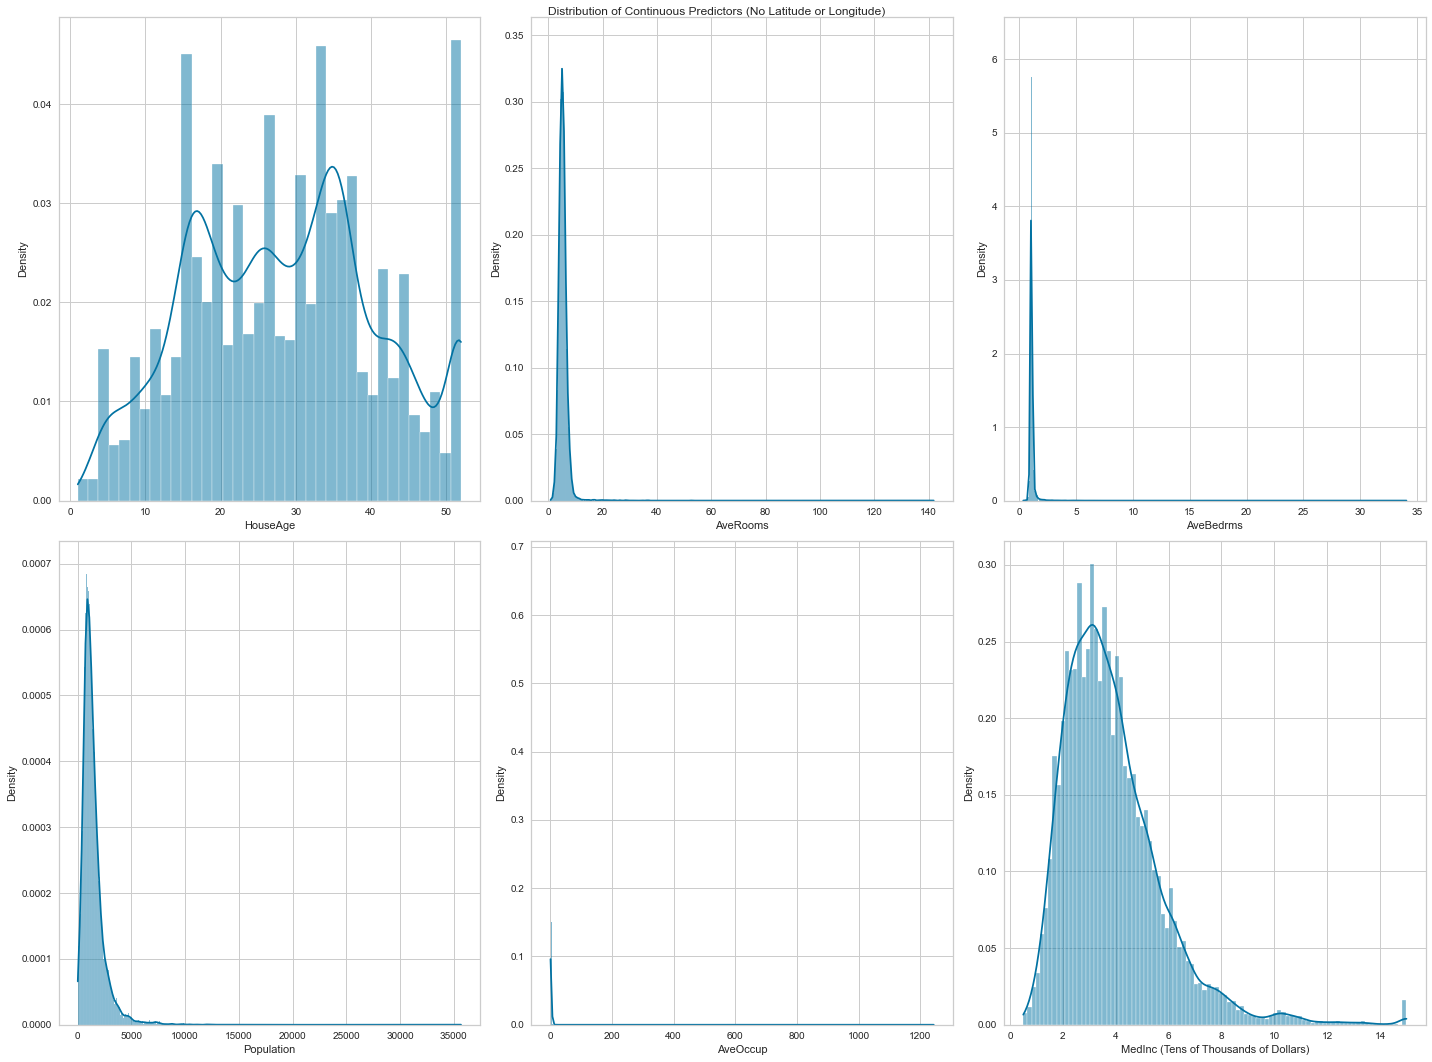

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
house_age = sns.histplot(housing, x='HouseAge', stat='density', kde=True, ax=ax[0,0])
average_rooms = sns.histplot(housing, x='AveRooms', stat='density', kde=True, ax=ax[0, 1])
average_brooms = sns.histplot(housing, x='AveBedrms', stat='density', kde=True, ax=ax[0, 2])
population = sns.histplot(housing, x='Population', stat='density', kde=True, ax=ax[1,0])
occupation = sns.histplot(housing, x='AveOccup', stat='density', kde=True, ax=ax[1, 1])
income = sns.histplot(housing, x='MedInc', stat='density', kde=True, ax=ax[1, 2])
income.set_xlabel('MedInc (Tens of Thousands of Dollars)')
fig.suptitle('Distribution of Continuous Predictors (No Latitude or Longitude)')
plt.tight_layout()

Printing summary statistics and performing a visual assessment of select independent variables in the data shows the presence of extreme outliers in the AveOccup, AveBedrms, and AveRooms features. Creating a boxplot for each of the three predictors further validates this assumption.

In [10]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Box(y=housing['AveRooms'], name='AveRooms'), row=1, col=1)
fig.add_trace(go.Box(y=housing['AveBedrms'], name='AveBedrms'), row=1, col=2)
fig.add_trace(go.Box(y=housing['AveOccup'], name='AveOccup'), row=1, col=3)
fig.update_layout(title_text='Visual inspection of Outliers', title_x=0.5)
fig.show()

Text(0.5, 0, 'MedHouseVal (Hundreds of Thousands of Dollars)')

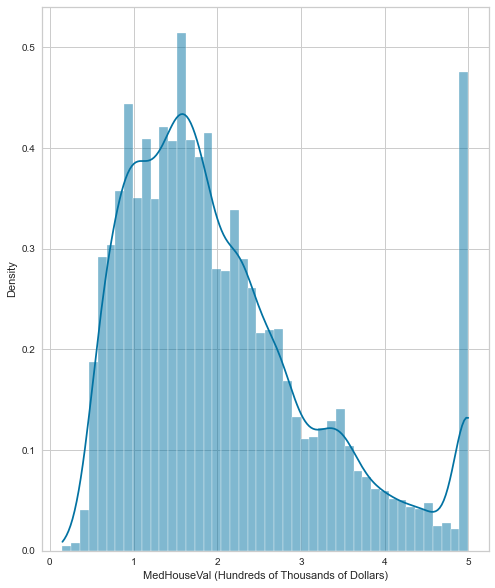

In [11]:
fig, ax = plt.subplots(figsize=(8, 10))
home_value = sns.histplot(housing, x='MedHouseVal', stat='density', kde=True)
home_value.set_xlabel('MedHouseVal (Hundreds of Thousands of Dollars)')

Plotting the target variable "MedHouseVal" shows that the variable appears to be approximately normally distributed aside from the presence of outliers in the right tail of the distribution.

## *__Multiple Linear Regression__*


Text(0.5, 1.0, "Pearson's Correlation")

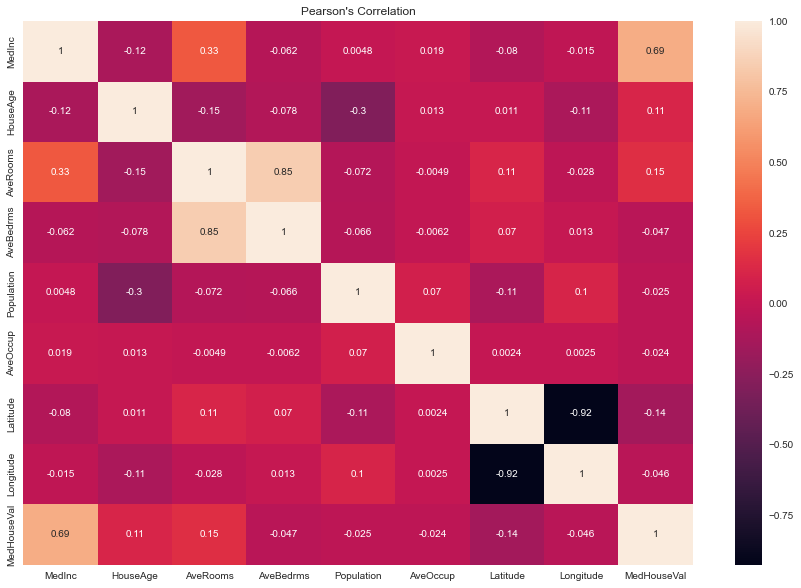

In [12]:
"""Visualize correlation between continuous variables"""
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(housing.corr(),
            annot=True).set_title('Pearson\'s Correlation')

Visualizing the correlation matrix of the data shows the possible existence of a strong linear relationship between the following sets of continuous variables:

- (MedInc, MedHouseVal)
- (Longitude, Latitude)
- (AveRooms, AveBedrms)

In particular the correlation between AveRooms and AveBedrms suggests issues with multi-colinearity when fitting a regresssion model.

In [13]:
"""separate predictors and target"""
predictors = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
x = housing[predictors]
y = housing['MedHouseVal']

In [14]:
"""create a multiple linear regression model sklearn"""
model_OLS = LinearRegression()
model_OLS.fit(X=x, y=y)
ols_prediction = model_OLS.predict(x)

Fitting an ordinary least squares regresssion model using the "LinearRegression" module from the sklearn package produces the following regression coefficients.

In [15]:
coeff_Mat = dict(zip(predictors, model_OLS.coef_))
coeff_Mat['Intercept'] = model_OLS.intercept_
coeff_Mat = pd.DataFrame.from_dict(coeff_Mat, orient='index')
coeff_Mat.rename(columns={0 : 'OLS'}, inplace=True)
coeff_Mat.head(9)

,OLS
MedInc,0.436693
HouseAge,0.009436
AveRooms,-0.107322
AveBedrms,0.645066
Population,-0.000004
AveOccup,-0.003787
Latitude,-0.421314
Longitude,-0.434514
Intercept,-36.941920


In [16]:
error = mean_squared_error(y, ols_prediction)
print("The ordinary least squares regression model fit the data with a Mean Squared Error of {}".format(error))

The ordinary least squares regression model fit the data with a Mean Squared Error of 0.5243209861846072


/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



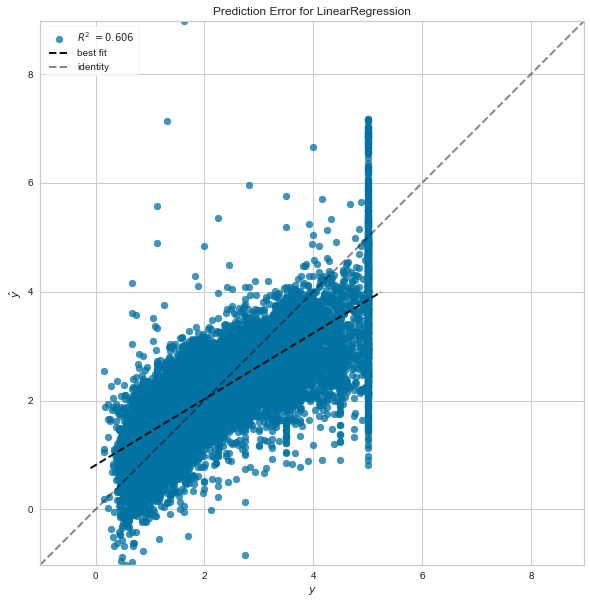

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [18]:
"""plot the prediction error"""
fig, ax = plt.subplots(figsize=(15, 10))
errors = PredictionError(model_OLS)
errors.fit(x, y)
errors.score(x, y)
errors.show()

Plotting errors produced by the model again shows the presence of extreme outliers in the data. With an R-Squared value of approximatley 0.606 the model was only able to explain 60% of the variablility in obsevations.

Plotting Cook's Distance confirms the effects of extreme outliers.

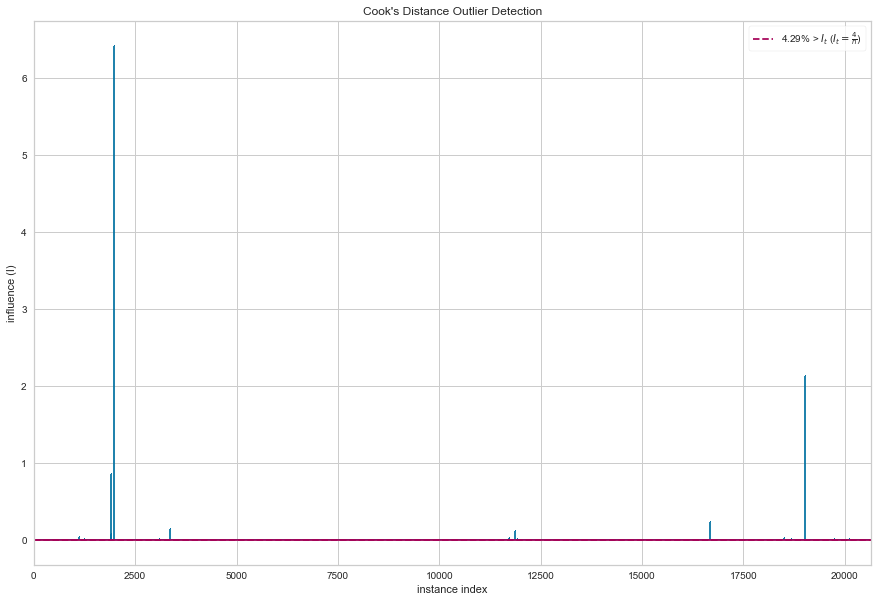

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
cook = CooksDistance(draw_threshold=True)
cook.fit(x, y)
cook.show()

Text(0.5, 1.0, 'Residual vs Fitted')

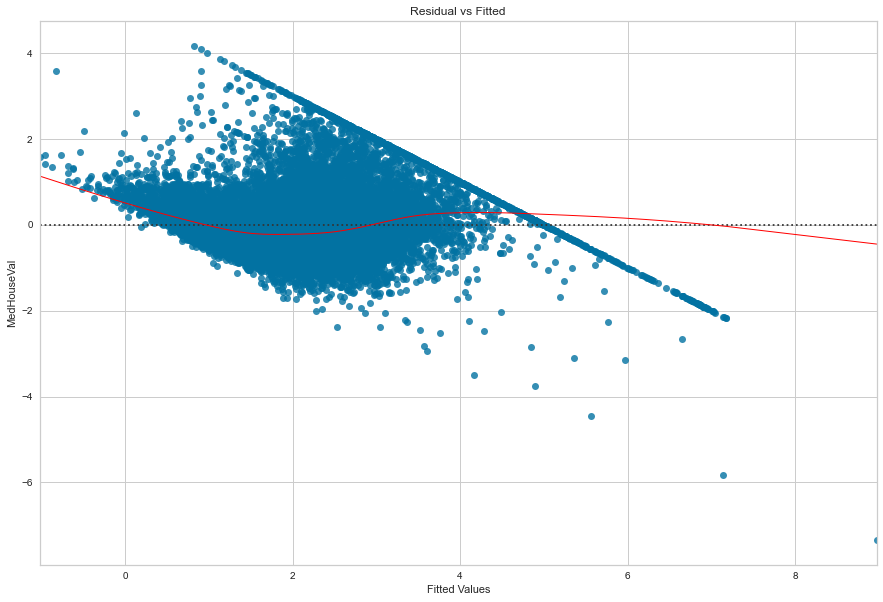

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.residplot(x=ols_prediction, y=y, lowess=True,
              line_kws={'color' : 'red', 'lw' : 1, 'alpha' : 1})
plt.xlabel('Fitted Values')
plt.ylabel('MedHouseVal')
plt.title('Residual vs Fitted')

Plotting residuals vs fitted values and fitting a "Loess Curve" to the errors shows the ordinary least squares regession assumption normality of residuals has been violated. The quadratic appearance of the Loess Curve and the fan shape of the residual errors confirms the violation.

Additional techniques for fitting a regression model to the data should be pursued. Mainly, Ridge Regression and Lasso Regression. Ridge and Lasso are both commonly referred to as shrinkage methods. The two techniques apply a penalty "$\lambda$" to the regression equation which seeks to reduce variablitity in coefficients estimated by a given model. 

## *_Ridge Regression_*

The "ManualAlphaSelection" module available for import from the Yellowbrick visualization API can be used to help estimate the opitmal value of $\lambda$ for fitting a Ridge regression model to the data.

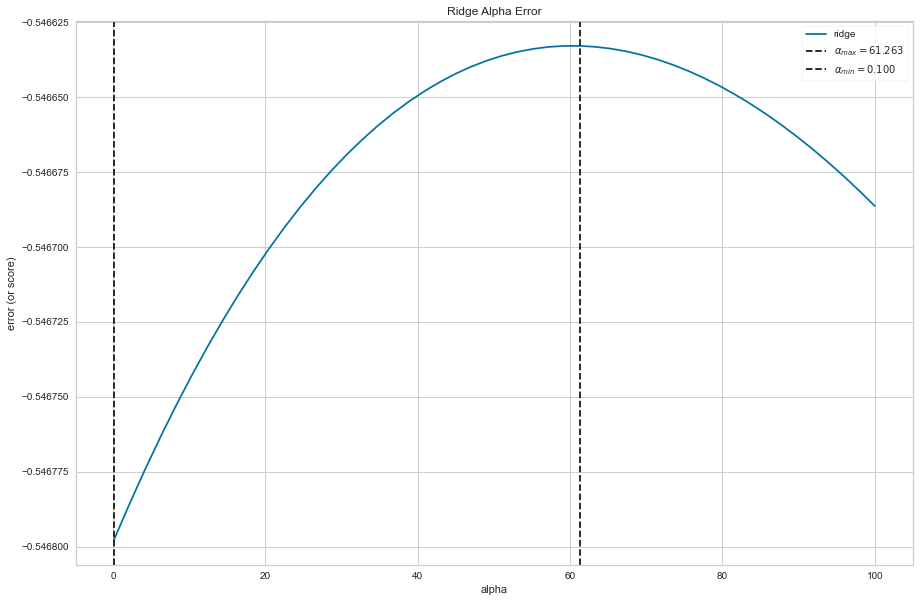

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
alphas = np.linspace(0.1, 100)

ridge_alphas = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=15,
    scoring='neg_mean_squared_error'
)
ridge_alphas.fit(x, y)
ridge_alphas.show()

Plotting the error for increasing values of $\lambda$ shows that reduction in error levels off at $\lambda=61.263$. Based on the above results values of $\lambda$ will be limited to a range of 20 to 61.263. Folowing update the final Ridge Regression model will be fit using the RidgeCV module available for import from sklearn.

In [23]:
"""fit the cross-validated ridge model"""
updated_alphas = np.linspace(20, 61.263)
model_Ridge = RidgeCV(alphas=updated_alphas, cv=15)
model_Ridge.fit(x, y)
ridge_predictions = model_Ridge.predict(x)

Fitting a Ridge Regresssion model using the "Ridge" module from the sklearn package produces the following regression coefficients.

In [24]:
ridge_coeff_Mat = dict(zip(predictors, model_Ridge.coef_))
ridge_coeff_Mat['Intercept'] = model_Ridge.intercept_
ridge_coeff_Mat = pd.DataFrame.from_dict(ridge_coeff_Mat, orient='index')
ridge_coeff_Mat.rename(columns={0 : 'Ridge'}, inplace=True)
ridge_coeff_Mat.head(9)

,Ridge
MedInc,0.431189
HouseAge,0.009533
AveRooms,-0.096758
AveBedrms,0.588925
Population,-0.000004
AveOccup,-0.003777
Latitude,-0.420094
Longitude,-0.432489
Intercept,-36.721054


/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RidgeCV was fitted with feature names



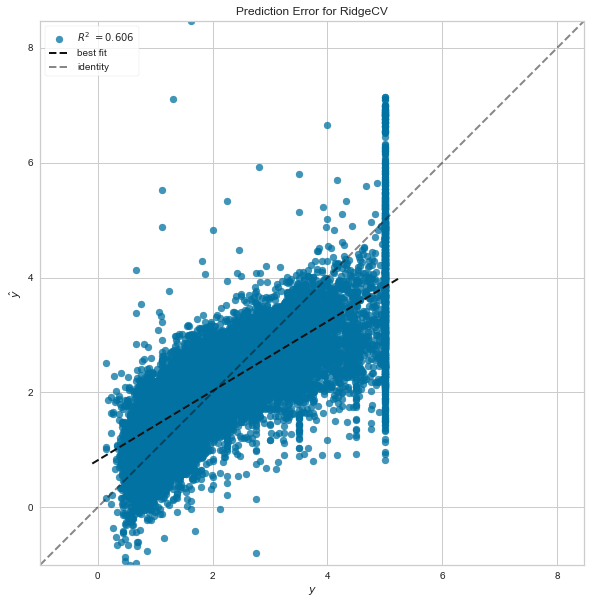

<AxesSubplot:title={'center':'Prediction Error for RidgeCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
"""plot the prediction error"""
fig, ax = plt.subplots(figsize=(15, 10))
errors = PredictionError(model_Ridge)
errors.fit(x, y)
errors.score(x, y)
errors.show()

In [26]:
error = mean_squared_error(y, ridge_predictions)
print("The Ridge Regression model fit the data with a Mean Squared Error of {}".format(error))

The Ridge Regression model fit the data with a Mean Squared Error of 0.5244333191355521


Plotting errors produced by the model again shows the presence of extreme outliers in the data. An R-Squared value of approximatley 0.606 is identical to that produced by the Ordinary Least Squares Regression model.

Text(0.5, 1.0, 'Residual vs Fitted')

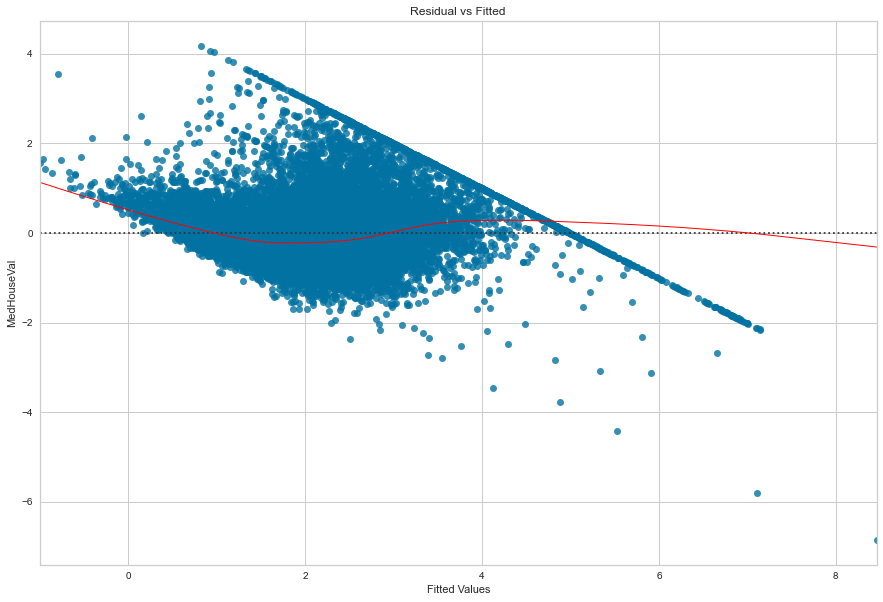

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.residplot(x=ridge_predictions, y=y, lowess=True,
              line_kws={'color' : 'red', 'lw' : 1, 'alpha' : 1})
plt.xlabel('Fitted Values')
plt.ylabel('MedHouseVal')
plt.title('Residual vs Fitted')

Plotting residuals vs fitted values and fitting a "Loess Curve" to the errors determines fitting a Ridge Regression model to the data did not affect the distribution of residuals.

Applying the L2 penalty to coefficents produced by fitting a regession model to the data had little effect on the results of the analysis. In fact, the Ridge Regression model produced identical results to those of Ordinary Least Squares Regression.

## *_Lasso Regression_*

The "ManualAlphaSelection" module available for import from the Yellowbrick visualization API can be used to help estimate the opitmal value of $\lambda$ for fitting a Lasso Regression model to the data.

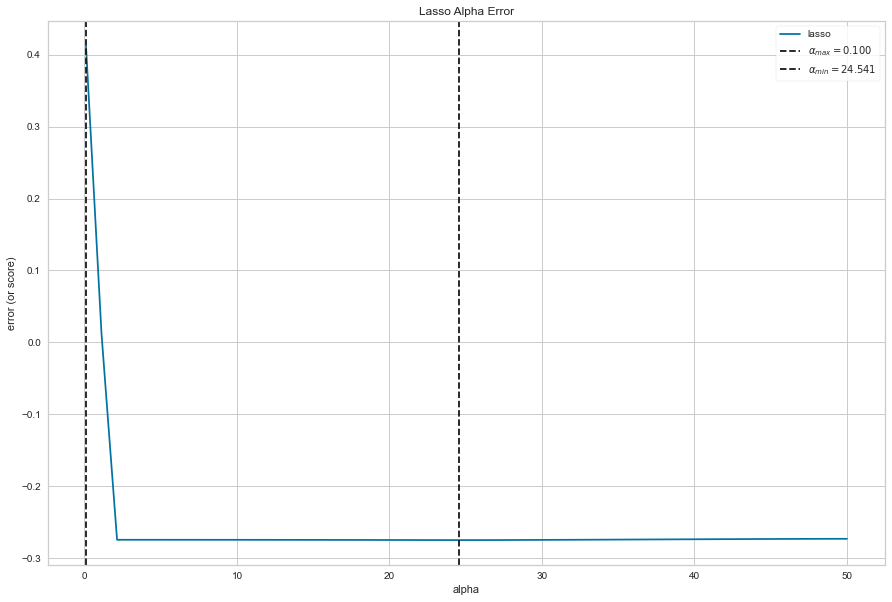

<AxesSubplot:title={'center':'Lasso Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
alphas = np.linspace(0.1, 50)

ridge_alphas = ManualAlphaSelection(
    Lasso(max_iter=10000),
    alphas=alphas,
    cv=15,
)
ridge_alphas.fit(x, y)
ridge_alphas.show()

Plotting the error for increasing values of $\lambda$ shows that reduction in error peaks somewhere between $\lambda=0.1$ and $\lambda=5$. Based on the above results values of $\lambda$ will be limited to a range of 0.1 to 10. Folowing update the final Lasso Regression model will be fit using the LassoCV module available for import from sklearn.

In [29]:
adjusted_alphas = np.linspace(0.1, 10)
model_Lasso = LassoCV(alphas=adjusted_alphas, cv=15, max_iter=10000)
model_Lasso.fit(x, y)
lasso_predictions = model_Lasso.predict(x)

Fitting a Lasso Regresssion model using the "Lasso" module from the sklearn package produces the following regression coefficients.

In [30]:
lasso_coeff_Mat = dict(zip(predictors, model_Lasso.coef_))
lasso_coeff_Mat['Intercept'] = model_Lasso.intercept_
lasso_coeff_Mat = pd.DataFrame.from_dict(lasso_coeff_Mat, orient='index')
lasso_coeff_Mat.rename(columns={0 : "Lasso"}, inplace=True)
lasso_coeff_Mat.head(8)

,Lasso
MedInc,0.390583
HouseAge,0.015082
AveRooms,-0.000000
AveBedrms,0.000000
Population,0.000018
AveOccup,-0.003323
Latitude,-0.114214
Longitude,-0.099225


/Users/benkarabinus/.local/share/virtualenvs/COMP4431-N1ravMBP/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LassoCV was fitted with feature names



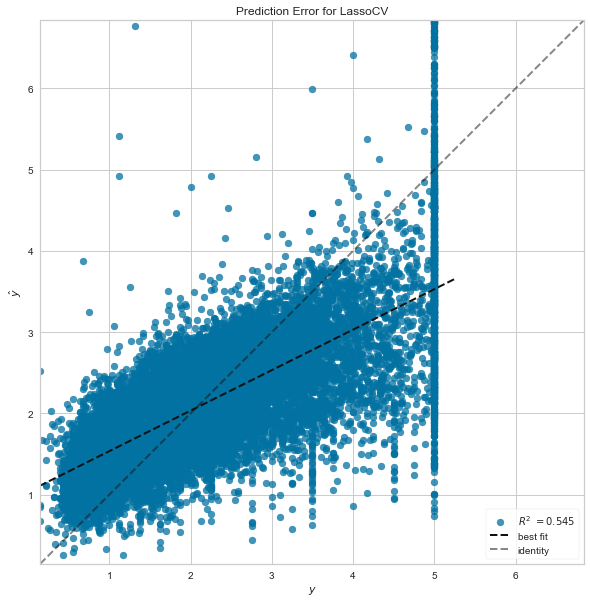

<AxesSubplot:title={'center':'Prediction Error for LassoCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [31]:
"""plot the prediction error"""
fig, ax = plt.subplots(figsize=(15, 10))
errors = PredictionError(model_Lasso)
errors.fit(x, y)
errors.score(x, y)
errors.show()

In [32]:
error = mean_squared_error(y, lasso_predictions)
print("The Lasso Regression model fit the data with a Mean Squared Error of {}".format(error))

The Lasso Regression model fit the data with a Mean Squared Error of 0.6055004347252055


Text(0.5, 1.0, 'Residual vs Fitted')

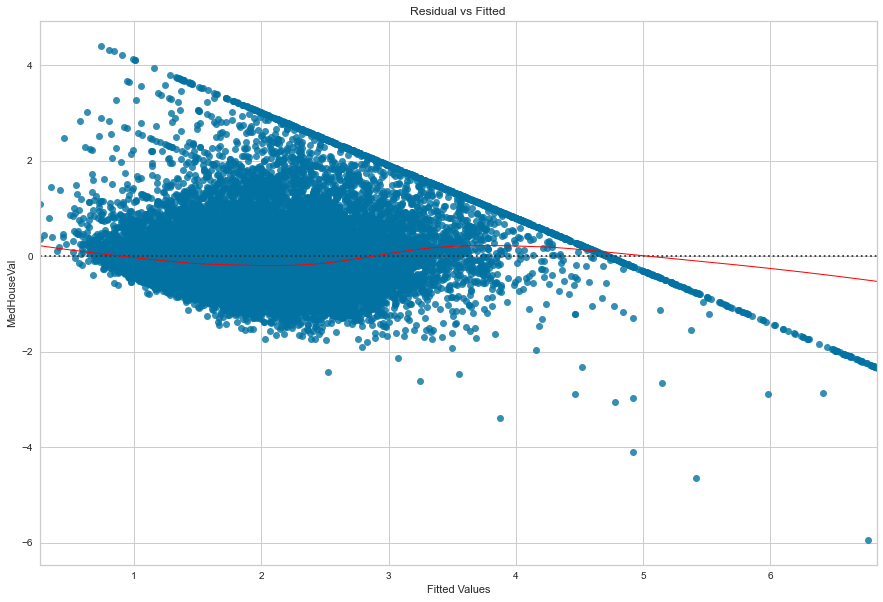

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.residplot(x=lasso_predictions, y=y, lowess=True,
              line_kws={'color' : 'red', 'lw' : 1, 'alpha' : 1})
plt.xlabel('Fitted Values')
plt.ylabel('MedHouseVal')
plt.title('Residual vs Fitted')

Plotting residuals vs fitted values and fitting a "Loess Curve" to the errors determines fitting a Lasso Regression model had minimal effect on the distribution of residuals.

## *_Conclusion_*

Fitting an Ordinary Least Squares Regression model to the data produced poor results. The presence of extreme otliers in the data violated the regression assumption of linearity. The mean squared error produced by the Ordinary Least Squares Regression model was 0.5243209861846072.

Applying shrinkage methods to the coefficients produced by fitting a regression model to the data had little effect on model performance. Comparing the coefficients determined by each model shows that Ordinary Least Squares Regression and Ridge Regression produced almost identical values. Lasso Regresssion was more effective in handling some of the issues seen in the data during exploratory analysis. The Lasso model completely dropped both the AveRooms and AveBedrms predictors from the regression equation eliminating problems with colinearity between the two predictors. The mean squared error produced by the Ridge Regression model was nearly identical to that produced by Ordinary Least Squares Regression 0.5244333191355521. The Lasso Regression model produced slightly poorer results with mean squared error of 0.6055004347252055.









In [34]:
coefficients = pd.merge(coeff_Mat, ridge_coeff_Mat, right_index=True, left_index=True)
coefficients = pd.merge(coefficients, lasso_coeff_Mat, right_index=True, left_index=True)
coefficients

,OLS,Ridge,Lasso
MedInc,0.436693,0.431189,0.390583
HouseAge,0.009436,0.009533,0.015082
AveRooms,-0.107322,-0.096758,-0.000000
AveBedrms,0.645066,0.588925,0.000000
Population,-0.000004,-0.000004,0.000018
AveOccup,-0.003787,-0.003777,-0.003323
Latitude,-0.421314,-0.420094,-0.114214
Longitude,-0.434514,-0.432489,-0.099225
Intercept,-36.941920,-36.721054,-7.684589


Further analyis of the data is warranted. None of the three regression techniques applied fit the data well. The effect of extreme otliers should be investigated furhter. Removal of outliers and/or normalization of the data should be carried out prior to further analysis.